# **sunil naunde**
IT3273

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/gdrive/MyDrive/ML/Datasets/GroceryStoreDataSet.csv')

In [ ]:
df

,"MILK,BREAD,BISCUIT"
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [ ]:
df.rename(columns={"MILK,BREAD,BISCUIT": "PRODUCTS"}, inplace=True)

In [ ]:
df

,PRODUCTS
0,"BREAD,MILK,BISCUIT,CORNFLAKES"
1,"BREAD,TEA,BOURNVITA"
2,"JAM,MAGGI,BREAD,MILK"
3,"MAGGI,TEA,BISCUIT"
4,"BREAD,TEA,BOURNVITA"
5,"MAGGI,TEA,CORNFLAKES"
6,"MAGGI,BREAD,TEA,BISCUIT"
7,"JAM,MAGGI,BREAD,TEA"
8,"BREAD,MILK"
9,"COFFEE,COCK,BISCUIT,CORNFLAKES"


In [ ]:
# prompt: split and convert list  using lambda function

df['PRODUCTS'] = df['PRODUCTS'].apply(lambda x: x.split(','))


In [ ]:
df

,PRODUCTS
0,"[BREAD, MILK, BISCUIT, CORNFLAKES]"
1,"[BREAD, TEA, BOURNVITA]"
2,"[JAM, MAGGI, BREAD, MILK]"
3,"[MAGGI, TEA, BISCUIT]"
4,"[BREAD, TEA, BOURNVITA]"
5,"[MAGGI, TEA, CORNFLAKES]"
6,"[MAGGI, BREAD, TEA, BISCUIT]"
7,"[JAM, MAGGI, BREAD, TEA]"
8,"[BREAD, MILK]"
9,"[COFFEE, COCK, BISCUIT, CORNFLAKES]"


In [ ]:


from mlxtend.preprocessing import TransactionEncoder

# Convert the 'PRODUCTS' column to a list of lists
products_list = df['PRODUCTS'].tolist()

# Create a transaction encoder object
te = TransactionEncoder()

# Fit and transform the data
te_ary = te.fit_transform(products_list)

# Convert the resulting array to a DataFrame
df_te = pd.DataFrame(te_ary, columns=te.columns_)

df_te


,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,True,False,False,True,False,False
1,False,True,True,False,False,False,False,False,False,False,True
2,False,False,True,False,False,False,True,True,True,False,False
3,True,False,False,False,False,False,False,True,False,False,True
4,False,True,True,False,False,False,False,False,False,False,True
5,False,False,False,False,False,True,False,True,False,False,True
6,True,False,True,False,False,False,False,True,False,False,True
7,False,False,True,False,False,False,True,True,False,False,True
8,False,False,True,False,False,False,False,False,True,False,False
9,True,False,False,True,True,True,False,False,False,False,False


In [ ]:


from mlxtend.frequent_patterns import apriori, association_rules

# Apply the apriori algorithm
frequent_itemsets = apriori(df_te, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Print the association rules
print(rules)


            antecedents           consequents  antecedent support  \
0             (BISCUIT)               (BREAD)            0.315789   
1                (COCK)             (BISCUIT)            0.157895   
2          (CORNFLAKES)             (BISCUIT)            0.315789   
3             (BISCUIT)          (CORNFLAKES)            0.315789   
4           (BOURNVITA)               (BREAD)            0.210526   
..                  ...                   ...                 ...   
141   (CORNFLAKES, TEA)        (COFFEE, MILK)            0.105263   
142  (CORNFLAKES, MILK)         (TEA, COFFEE)            0.105263   
143       (TEA, COFFEE)    (CORNFLAKES, MILK)            0.052632   
144         (TEA, MILK)  (CORNFLAKES, COFFEE)            0.052632   
145      (COFFEE, MILK)     (CORNFLAKES, TEA)            0.052632   

     consequent support   support  confidence      lift  leverage  conviction  \
0              0.631579  0.157895    0.500000  0.791667 -0.041551    0.736842   
1        

In [ ]:


import pandas as pd

# Convert the association rules to a Pandas DataFrame
rules_df = pd.DataFrame(rules)

# Print the DataFrame
rules_df


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(BISCUIT),(BREAD),0.315789,0.631579,0.157895,0.500000,0.791667,-0.041551,0.736842,-0.277778
1,(COCK),(BISCUIT),0.157895,0.315789,0.105263,0.666667,2.111111,0.055402,2.052632,0.625000
2,(CORNFLAKES),(BISCUIT),0.315789,0.315789,0.157895,0.500000,1.583333,0.058172,1.368421,0.538462
3,(BISCUIT),(CORNFLAKES),0.315789,0.315789,0.157895,0.500000,1.583333,0.058172,1.368421,0.538462
4,(BOURNVITA),(BREAD),0.210526,0.631579,0.157895,0.750000,1.187500,0.024931,1.473684,0.200000
...,...,...,...,...,...,...,...,...,...,...
141,"(CORNFLAKES, TEA)","(COFFEE, MILK)",0.105263,0.052632,0.052632,0.500000,9.500000,0.047091,1.894737,1.000000
142,"(CORNFLAKES, MILK)","(TEA, COFFEE)",0.105263,0.052632,0.052632,0.500000,9.500000,0.047091,1.894737,1.000000
143,"(TEA, COFFEE)","(CORNFLAKES, MILK)",0.052632,0.105263,0.052632,1.000000,9.500000,0.047091,inf,0.944444
144,"(TEA, MILK)","(CORNFLAKES, COFFEE)",0.052632,0.210526,0.052632,1.000000,4.750000,0.041551,inf,0.833333


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-49-db440b5fbaa5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=rules_df, x='antecedents', y='support', palette='rocket')
/usr/local/lib/python3.10/dist-packages/pandas/core/algorithms.py:522: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  common = np.find_common_type([values.dtype, comps_arra

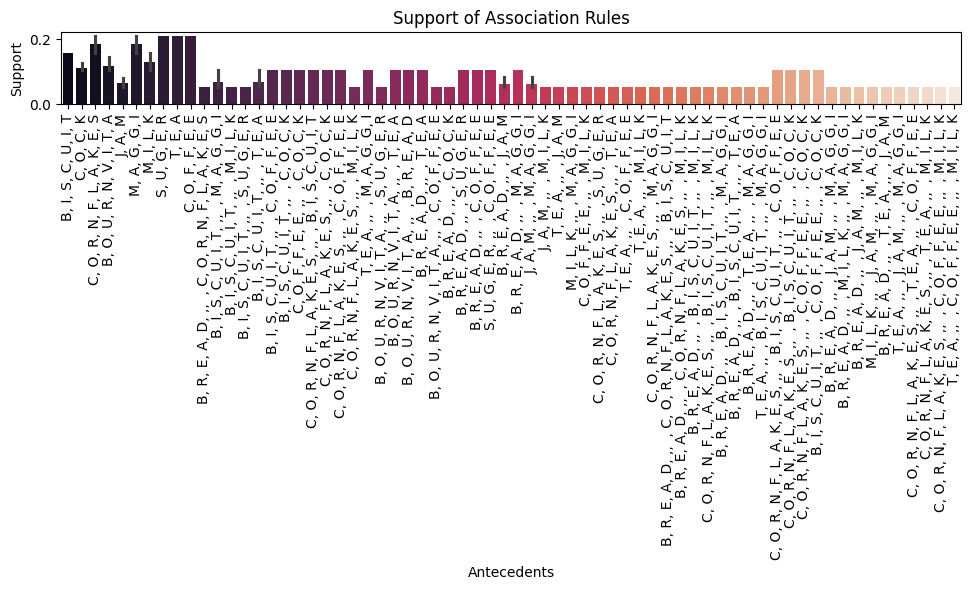

In [ ]:


import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot of the 'support' column
plt.figure(figsize=(10, 6))
sns.barplot(data=rules_df, x='antecedents', y='support', palette='rocket')
plt.xticks(rotation=90)
plt.xlabel('Antecedents')
plt.ylabel('Support')
plt.title('Support of Association Rules')
plt.tight_layout()
plt.show()
